In [2]:
# 훈련 세트 & Test 세트(30%)

In [3]:
# 앞 35마리 도미, 뒤 14마리 방어

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [11]:
# 전체 데이터
fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]

# 정답 데이터 - 정답이 있으므로 지도 학습
fish_target = [1] * 35 + [0] * 14

In [12]:
# 훈련 세트 (train set) - 학습용 데이터 (전체의 30%인 14개)

# 35개의 훈련 데이터
train_input = fish_data[:35]

# 35개의 정답 데이터
train_target = fish_target[:35]

In [14]:
# 테스트 세트 (test set) - 정확도 측정용 데이터

# 14개의 테스트 데이터
test_input = fish_data[35:]

# 14개의 정답 데이터
test_target = fish_target[35:]

In [15]:
# k-최근접 이웃 분류
from sklearn.neighbors import KNeighborsClassifier

In [16]:
kn = KNeighborsClassifier()

In [17]:
# 학습 - 훈련 세트

kn.fit(train_input, train_target)

KNeighborsClassifier()

In [19]:
# 분류 정확도 - 테스트 세트

kn.score(test_input, test_target)

0.0

In [23]:
# numpy package = List대신 numpy 배열을 사용하기 위함
import numpy as np

# 학습 & 테스트 세트 데이터 -> numpy 배열 변환
_train_input = np.array(train_input)
_test_input = np.array(test_input)

# print(_train_input)

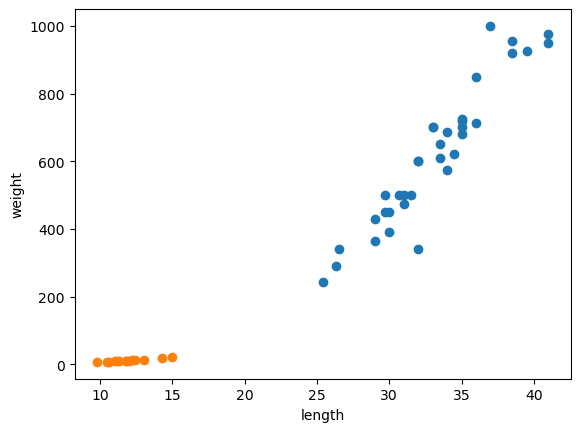

In [34]:
import matplotlib.pyplot as plt

# _train_input 각 행의 1번째 열을 1차원 배열로 가져옴,
# _train_input 각 행의 2번째 열을 1차원 배열로 가져옴
plt.scatter(_train_input[:, 0], _train_input[:, 1])

plt.scatter(_test_input[:, 0], _test_input[:, 1])

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

# 도미 데이터로 학습하고 방어 데이터로 학습하니 정답률이 0%인 모습
# 즉 데이터를 섞어줘야함!

In [36]:
# 샘플링 편향 방지 방법 - 데이터 섞기

index = np.arange(49)

# 매번 랜덤
np.random.shuffle(index)

print(index)

[34 42 10 11 26  0  4  6 43 27 41 37 18 29 39 47 20  5  3 32 19 30 44 24
 28  9 25 48 15 36 12 23  7 40 21 33 38 17  8 22  2 45 35 13 31 46  1 16
 14]


In [43]:
# 학습 데이터

input_data = np.array(fish_data)

# 배열이 총 (몇행, 몇열)인지 확인
print(input_data.shape)

target_data = np.array(fish_target)

print(target_data)

(49, 2)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [49]:
# numpy 배열 - index 번호 배열로 추출
input_data[[1, 2, 3, 10]]

array([[ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 31. , 475. ]])

In [57]:
# 랜덤 학습 세트

train_input = input_data[index[:35]]
train_target = target_data[index[:35]]

# print(train_input)
# print(train_target)

In [58]:
# 랜덤 테스트 세트

test_input = input_data[index[35:]]
test_target = target_data[index[35:]]

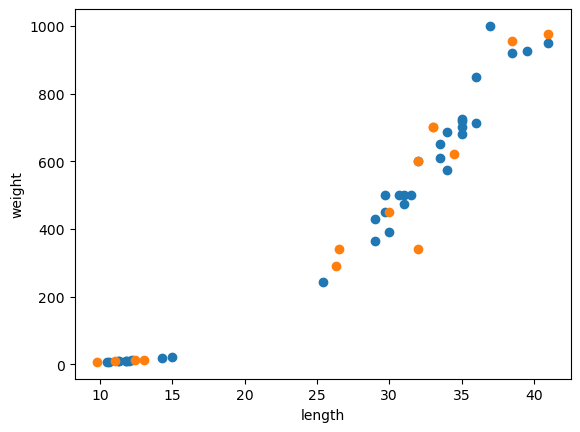

In [63]:
# 학습 데이터
plt.scatter(train_input[:, 0], train_input[:, 1])

# 테스트 데이터
plt.scatter(test_input[:, 0], test_input[:, 1])

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

# 랜덤으로 섞어 고르게 잘 분포된 모습

In [64]:
# 학습 세트로 훈련
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [66]:
# 정확도

kn.score(test_input, test_target)

1.0

In [68]:
kn.predict(test_input)

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1])

In [69]:
test_target

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1])